In [1]:
from read import read_features

In [2]:
features_files = ['1_20151124_noon_2.csv', '2_20151106_noon.csv', '3_20151024_noon.csv','4_20151105_noon.csv', '4_20151107_noon.csv',
            '5_20141108_noon.csv', '5_20151012_night.csv', '6_20151121_noon.csv','7_20151015_night.csv', '8_20151022_noon.csv', 
            '9_20151017_night.csv', '10_20151125_noon.csv', '11_20151024_night.csv', '12_20150928_noon.csv', '13_20150929_noon.csv',
            '14_20151014_night.csv','15_20151126_night.csv', '16_20151128_night.csv', '17_20150925_noon.csv', '18_20150926_noon.csv',
            '19_20151114_noon.csv', '20_20151129_night.csv', '21_20151016_noon.csv']

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [4]:
def knn_find_best_k(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    start = 3
    end = 11
    best = 1
    best_k = 3
    for k in range (start, end+1, 2):
        neigh = KNeighborsRegressor(n_neighbors=k)
        neigh.fit(X_train, y_train)

        predictions = neigh.predict(X_test)
        
        mse = mean_squared_error(y_test, predictions)
        if (mse < best):
            best_k = k
            best = mse
    
    neigh = KNeighborsRegressor(n_neighbors=best_k)
    neigh.fit(X_train, y_train)
    predictions = neigh.predict(X_test)
    print(f'K={best_k:02}: R^2 = {neigh.score(X, y):.4f}, MSE = {mean_squared_error(y_test, predictions):.4f}')
    return [best_k, neigh.score(X, y), mean_squared_error(y_test, predictions)]

In [78]:
def knn_predictions_plot(X, y, k=5):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)

    predictions = neigh.predict(X)
    mse = mean_squared_error(y_test, neigh.predict(X_test))

    plt.figure(figsize=(20, 8))
    plt.plot(y, color="black", label="real")
    plt.plot(predictions, color="red", label="predicted")
    plt.title(f'Comparativa entre los valores reales y predichos k:{k}, mse:{mse:.4f}')
    plt.xlabel('Epoch')
    plt.ylabel('% PERCLOS')
    plt.legend(loc='best')
    plt.show()

In [6]:
def knn_error_plot(X, y, k=5):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)

    predictions = neigh.predict(X)
    plt.figure(figsize=(20, 8))
    plt.axhline(y=0, color='black', linestyle='-')
    plt.plot(y-predictions, color="red")
    plt.title('Error en las predicciones respecto al valor real')
    plt.xlabel('Epoch')
    plt.ylabel('real-predicted')
    plt.show()

In [7]:
def knn_error_boxplot(X, y, k=5):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    predictions = neigh.predict(X)

    plt.figure(figsize=(20, 10))
    plt.boxplot(y-predictions, showfliers=True)
    plt.title('Diagrama de caja representando el error entre el valor real y las predicciones')
    plt.show()

K=11: R^2 = 0.5934, MSE = 0.0369


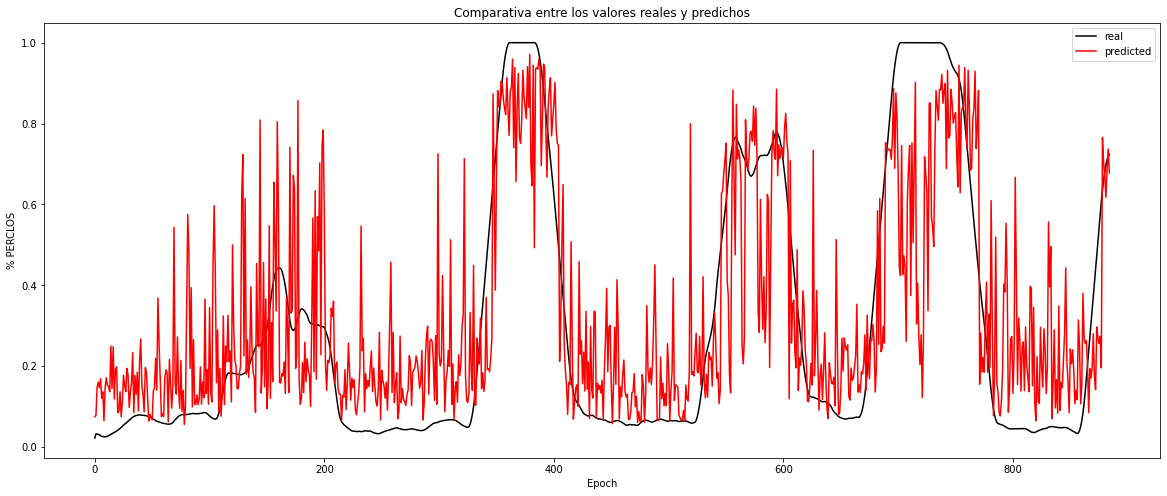

In [15]:
file = './features/21_20151016_noon.csv'
X, y = read_features(file, features=[1,2,4])
knn_find_best_k(X, y)
knn_predictions_plot(X, y, 11)

K=11: R^2 = 0.5934, MSE = 0.0369


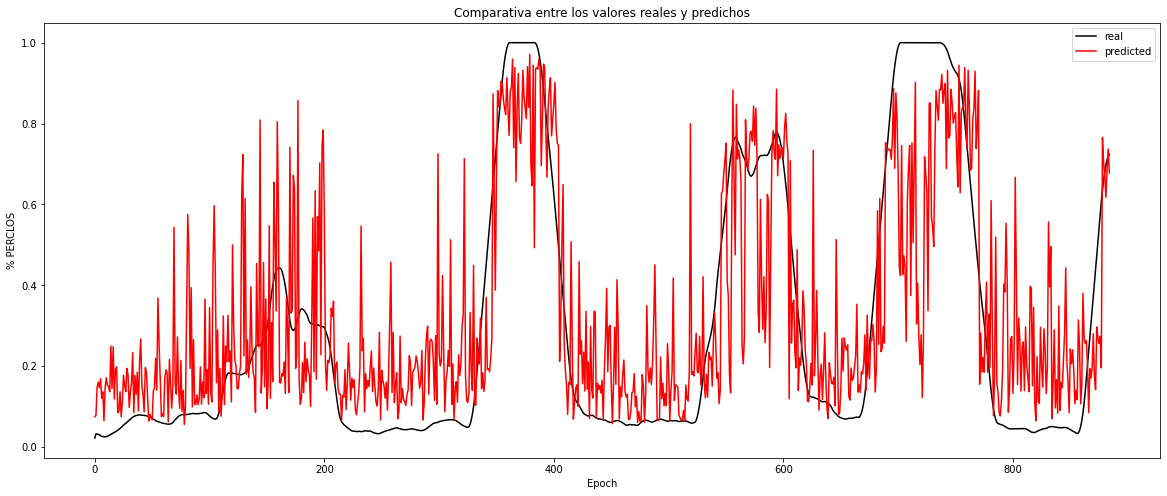

In [16]:
X, y = read_features(file, features=[1,4])
knn_find_best_k(X, y)
knn_predictions_plot(X, y, 11)

K=07: R^2 = 0.6096, MSE = 0.0370


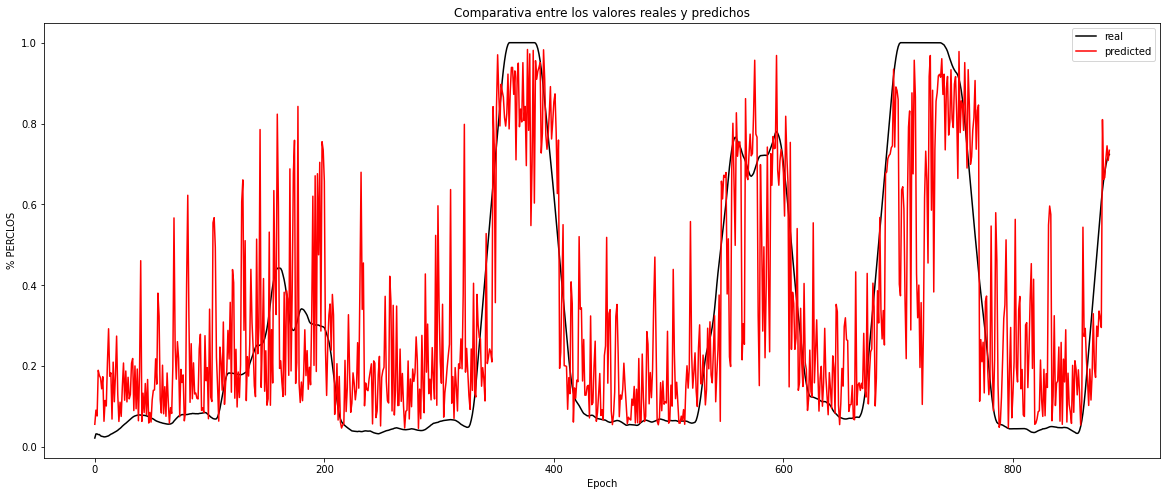

In [17]:
X, y = read_features(file, features=[1,2,4,5,6])
knn_find_best_k(X, y)
knn_predictions_plot(X, y, 7)

K=07: R^2 = 0.6096, MSE = 0.0370


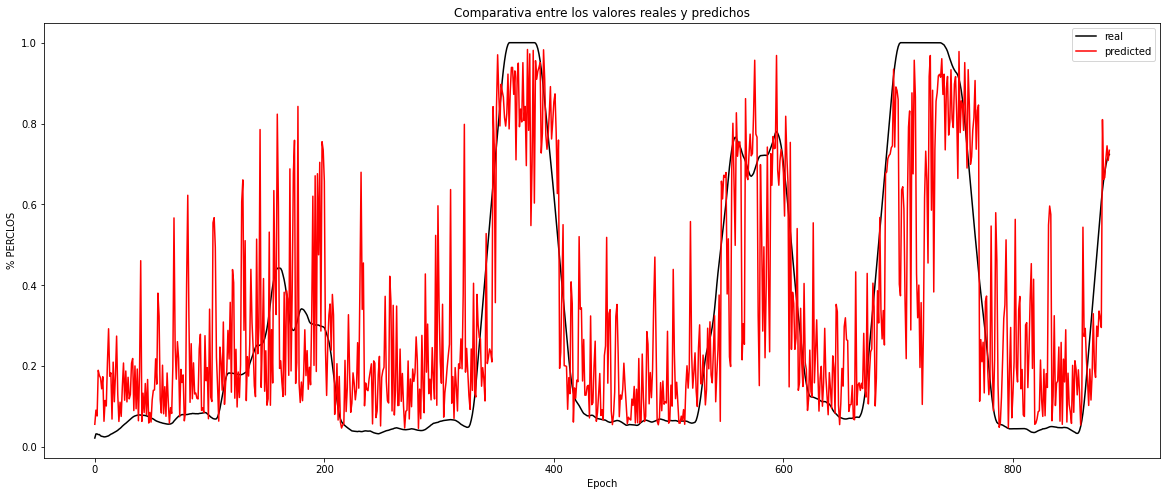

In [18]:
X, y = read_features(file, features=[1,4,5,6])
knn_find_best_k(X, y)
knn_predictions_plot(X, y, 7)

K=09: R^2 = 0.5960, MSE = 0.0371


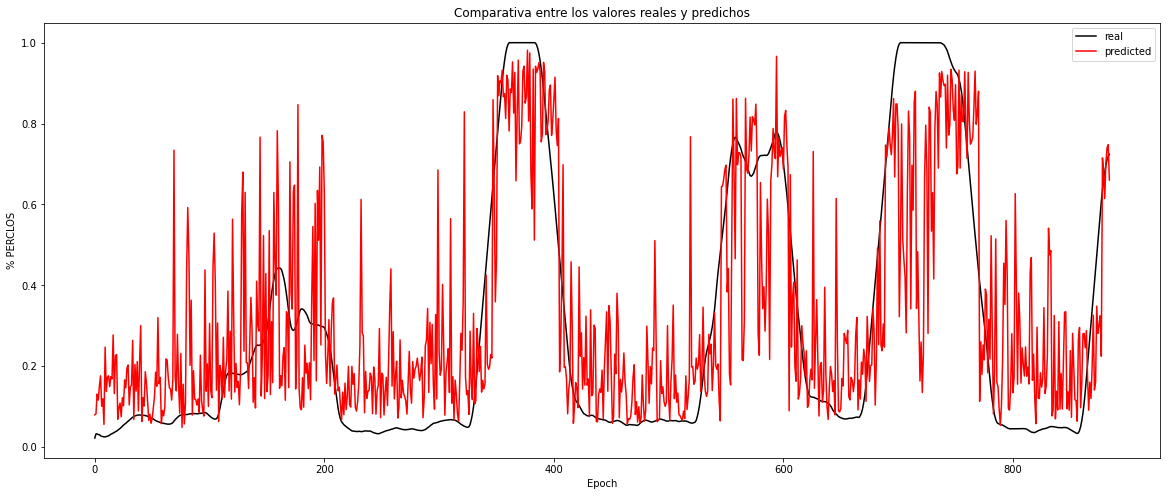

In [19]:
X, y = read_features(file, features=[0,1,2,4])
knn_find_best_k(X, y)
knn_predictions_plot(X, y, 9)